## 1.1. Import Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime,timedelta
import time

### 1.2. Load Data

In [26]:
data = pd.read_excel("Flight_Fare.xlsx")

In [27]:
pd.set_option("display.max_columns",None)

In [28]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### 1.3. Domain Analysis

### 1.4. Basic Checks

In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [29]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### Insighits
* Change the Date_of_Journey is object Dtype to DateTime Dtype
* Change the Dep_Time is object Dtype to DateTime Dtype
* Change the Duration is object Dtype to Datetime Dtype

In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
data.memory_usage()

Index                128
Airline            85464
Date_of_Journey    85464
Source             85464
Destination        85464
Route              85464
Dep_Time           85464
Arrival_Time       85464
Duration           85464
Total_Stops        85464
Additional_Info    85464
Price              85464
dtype: int64

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.duplicated().sum()

220

###  1.5. Exploratory Data Analysis
#### 1.5.1. Univariate Analysis

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [15]:
categorical_col=[]
for column in data.columns:
    if data[column].dtype == "object" and len(data[column].unique()) <=44:
        categorical_col.append(column)
        print(f"{column}: {data[column].unique()}")
        print("---------------------------------------------------------------")

Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
---------------------------------------------------------------
Date_of_Journey: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
---------------------------------------------------------------
Source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-----------------------------

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

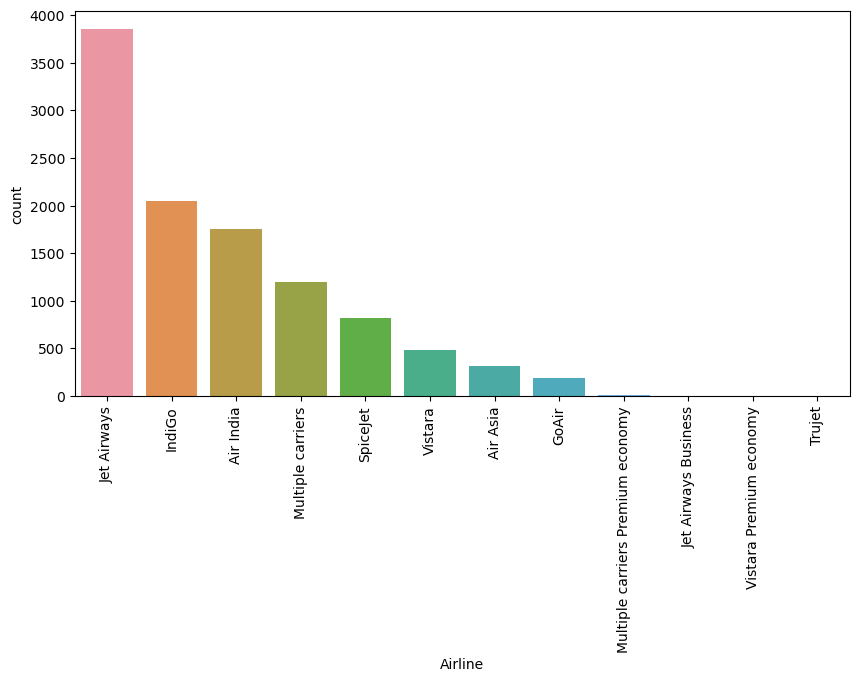

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="Airline",data=data,order=data.Airline.value_counts().index)
plt.xticks(rotation=90)

<Axes: xlabel='Source', ylabel='count'>

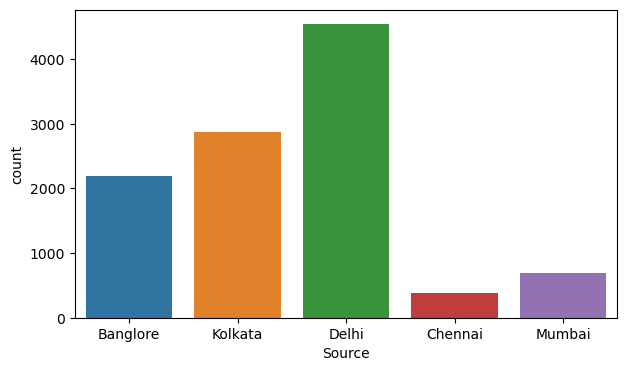

In [18]:
plt.figure(figsize=(7,4))
sns.countplot(x="Source",data=data)

<Axes: xlabel='Destination', ylabel='count'>

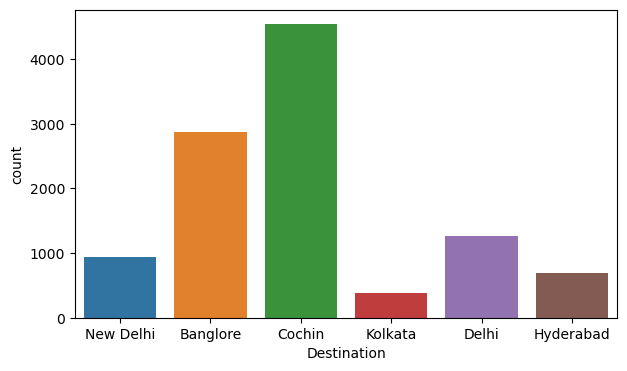

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x="Destination",data=data)

<Axes: xlabel='Total_Stops', ylabel='count'>

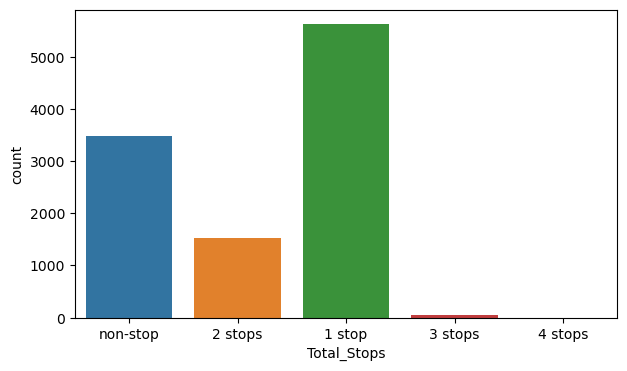

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x="Total_Stops",data=data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

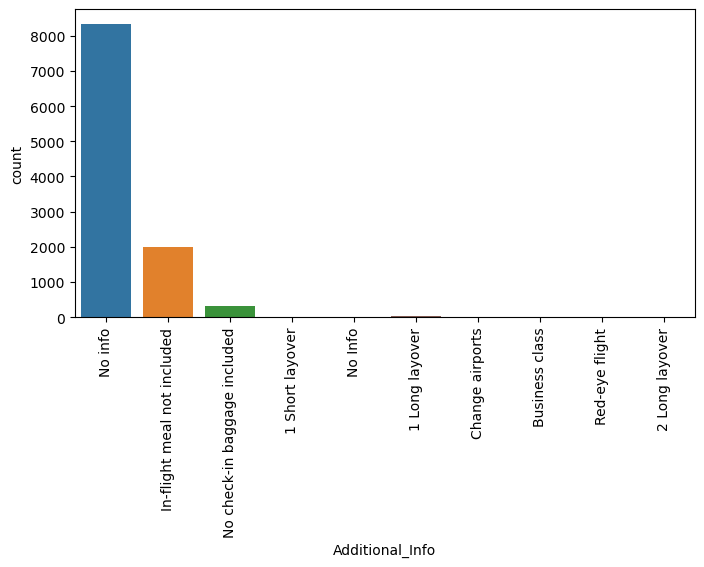

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x="Additional_Info",data=data)
plt.xticks(rotation=90)

#### 1.5.2 Bivariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

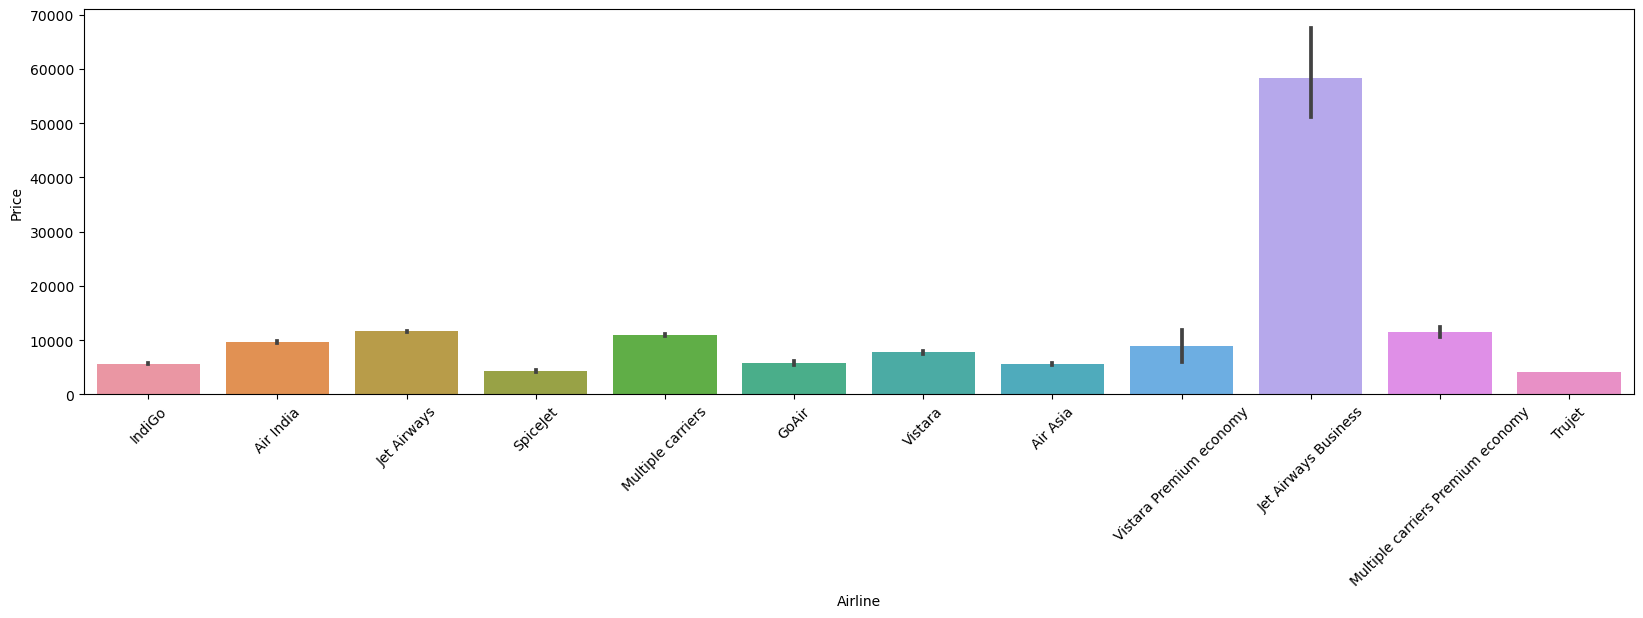

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(data=data,x="Airline",y="Price")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, '24/03/2019'),
  Text(1, 0, '1/05/2019'),
  Text(2, 0, '9/06/2019'),
  Text(3, 0, '12/05/2019'),
  Text(4, 0, '01/03/2019'),
  Text(5, 0, '24/06/2019'),
  Text(6, 0, '12/03/2019'),
  Text(7, 0, '27/05/2019'),
  Text(8, 0, '1/06/2019'),
  Text(9, 0, '18/04/2019'),
  Text(10, 0, '9/05/2019'),
  Text(11, 0, '24/04/2019'),
  Text(12, 0, '3/03/2019'),
  Text(13, 0, '15/04/2019'),
  Text(14, 0, '12/06/2019'),
  Text(15, 0, '6/03/2019'),
  Text(16, 0, '21/03/2019'),
  Text(17, 0, '3/04/2019'),
  Text(18, 0, '6/05/2019'),
  Text(19, 0, '15/05/2019'),
  Text(20, 0, '18/06/2019'),
  Text(21, 0, '15/06/2019'),
  Text(22, 0, '6/04/2019'),
  Text(23, 0, '18/05/2019'),
  Text(24, 0, '27/06/2019'),
  Text(25, 0, '21/05/2019'),
  Text(26, 0, '06/03/2019'),
  Text(27, 0, '3/06/2019'),
  Text

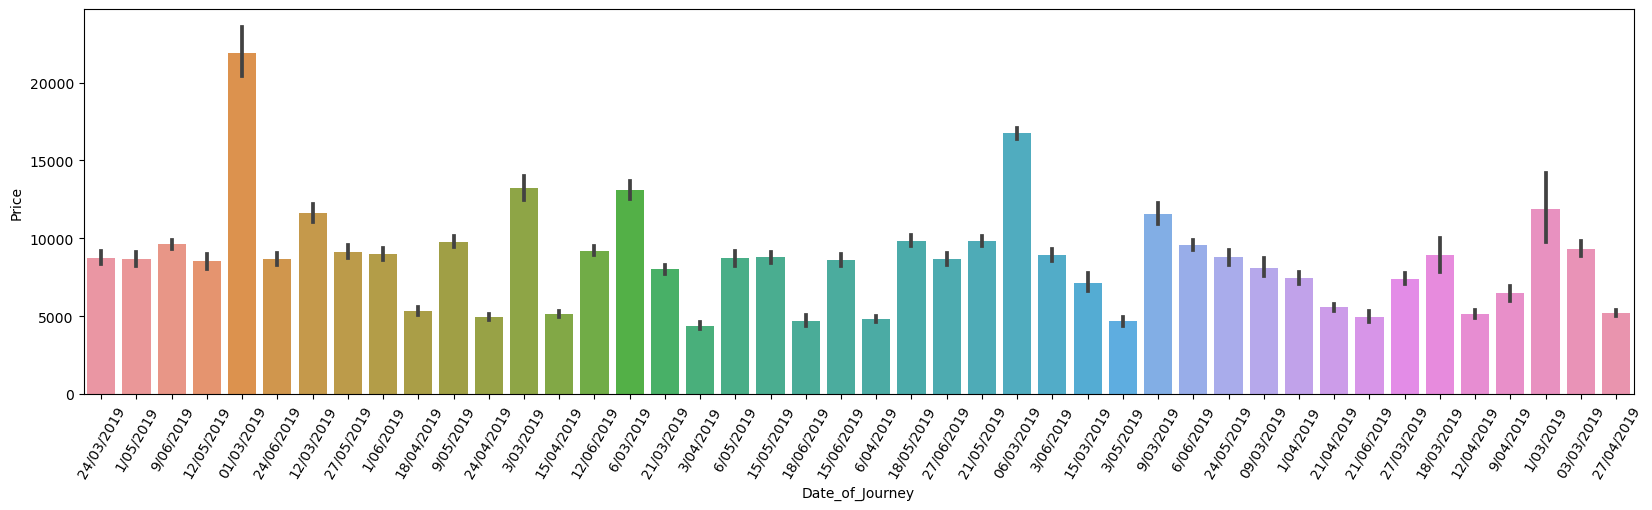

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(data=data,x="Date_of_Journey",y="Price")
plt.xticks(rotation=60)

<Axes: xlabel='Source', ylabel='Price'>

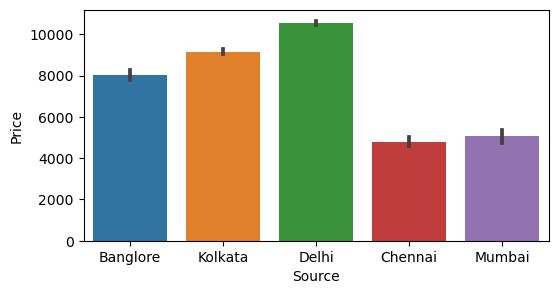

In [24]:
plt.figure(figsize=(6,3))
sns.barplot(data=data,x="Source",y="Price")

<Axes: xlabel='Destination', ylabel='Price'>

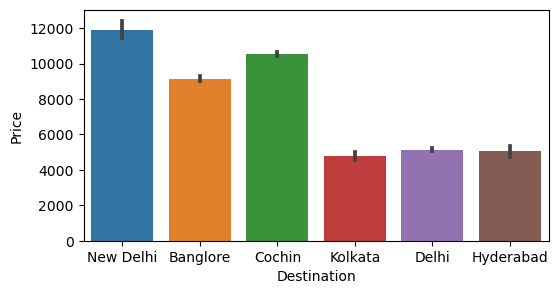

In [25]:
plt.figure(figsize=(6,3))
sns.barplot(data=data,x="Destination",y="Price")

### 1.6. Data Preprocessing

In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [27]:
data.duplicated().sum()

220

In [4]:
data[data.select_dtypes(include="O").isnull().any(axis=1)]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Airline,(All),NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sum of Price,Column Labels,NaN,NaN,NaN,NaN,NaN,NaN
4,Banglore,7877296,999210,89327,17686,8630850,NaN,17614369
5,Chennai,NaN,NaN,NaN,NaN,1824949,NaN,1824949
6,Delhi,31948170,14193020,323496,NaN,1345269,7480,47817435
7,Kolkata,19215578,3634910,144664,NaN,3298584,NaN,26293736
8,Mumbai,550901,500888,32553,NaN,2442275,NaN,3526617


In [5]:
data.dropna(inplace=True)

In [6]:
data[data.select_dtypes(include="O").isnull().any(axis=1)]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7


#### Extracting Date and Month from Date_of_Journey column
* data.day the method will extact only the day from the date
* data.month the method will extract only the month of that date

In [30]:
data["journey_day"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [31]:
data["journey_month"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [32]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [33]:
data["Dep_Hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour

In [34]:
data["Dep_Minutes"]=pd.to_datetime(data["Dep_Time"]).dt.minute

In [35]:
data.drop(["Dep_Time"],axis=1,inplace=True)

In [36]:
data["Arrival_Hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour

In [37]:
data["Arrival_Minutes"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [38]:
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [39]:
data["Duration"]=pd.to_timedelta(data["Duration"]).dt.total_seconds()

In [40]:
data["Duration"]=data["Duration"]/60

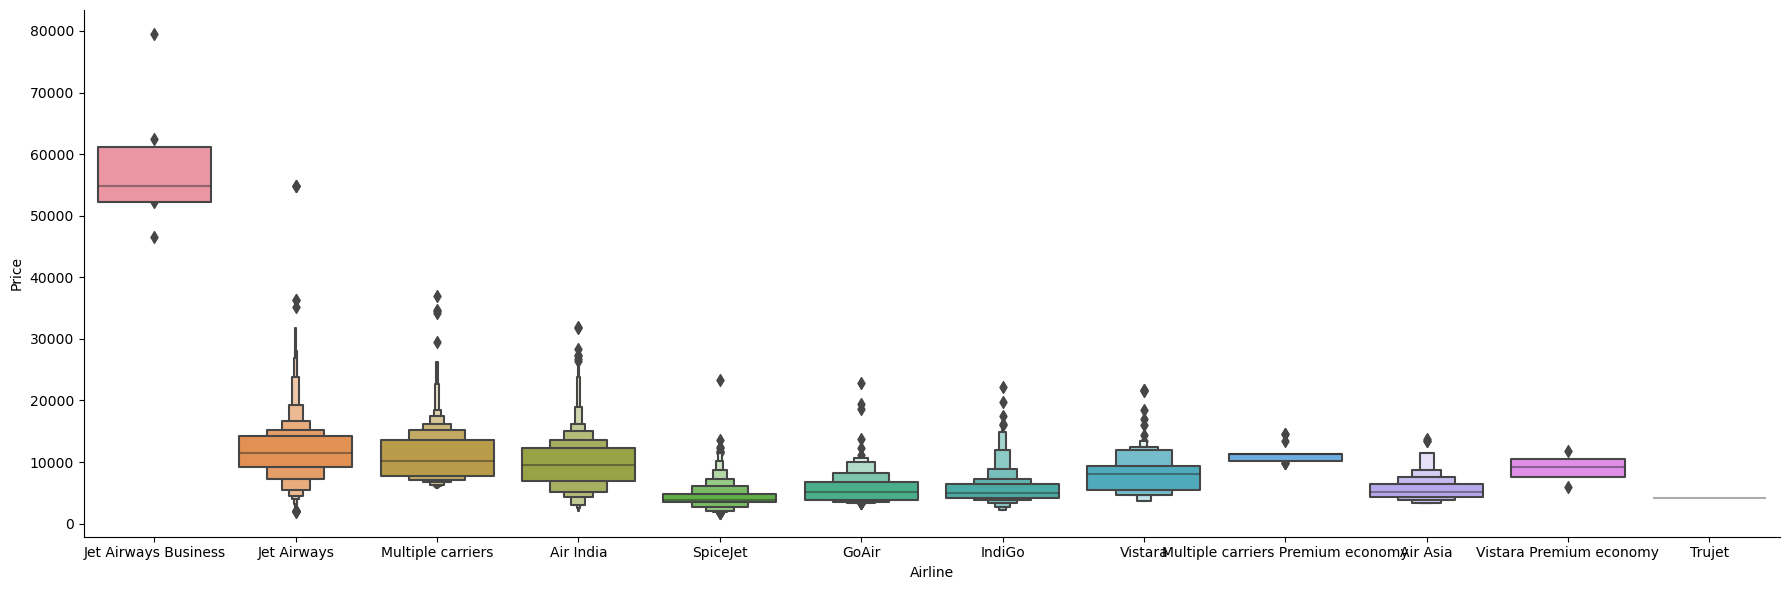

In [41]:
sns.catplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

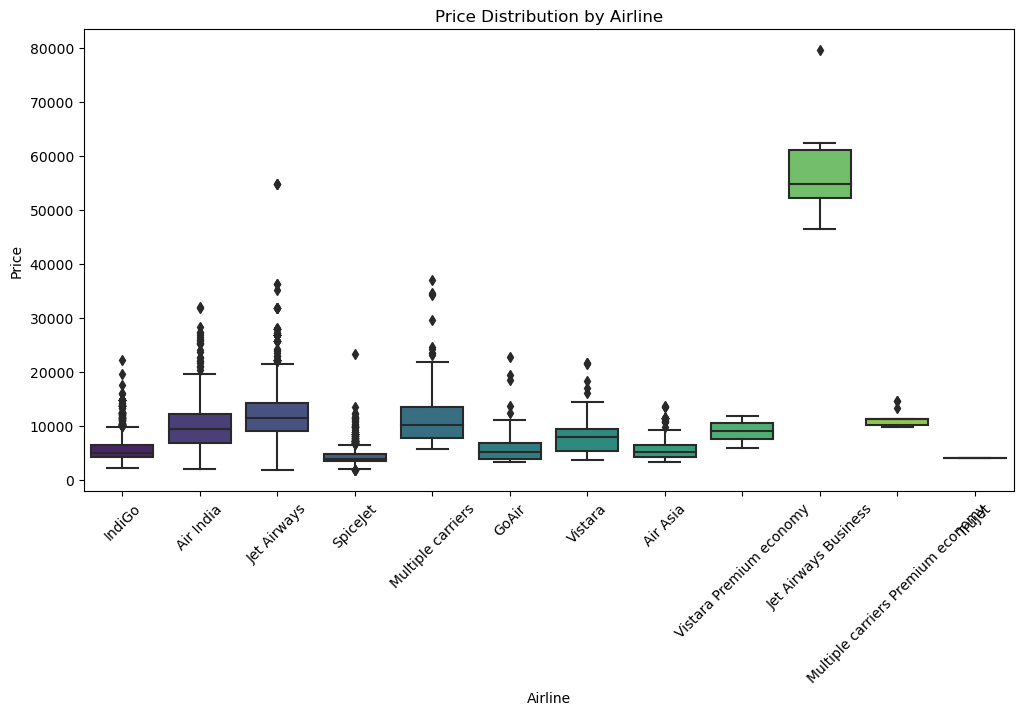

In [43]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x='Airline', y='Price', data=data, palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [44]:
data2=data.copy()

In [45]:
data2.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [46]:
df1 = pd.get_dummies(data2["Airline"],prefix="Airline",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(["Airline"],axis=1)

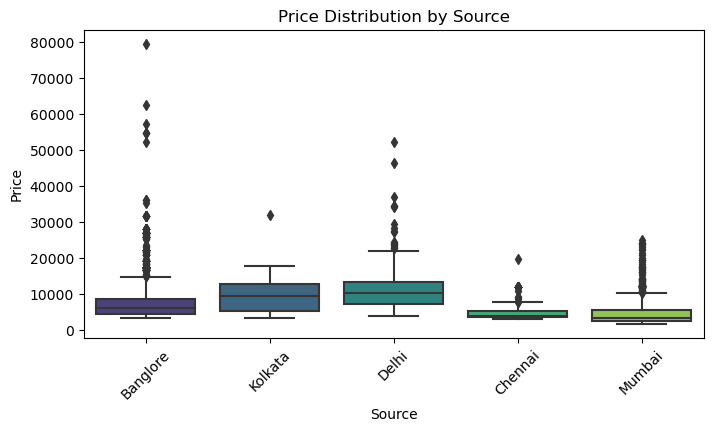

In [47]:
plt.figure(figsize=(8, 4))  # Set the figure size
sns.boxplot(x='Source', y='Price', data=data, palette='viridis')
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Price Distribution by Source')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [48]:
df2 = pd.get_dummies(data2["Source"],prefix="Source",drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(["Source"],axis=1)

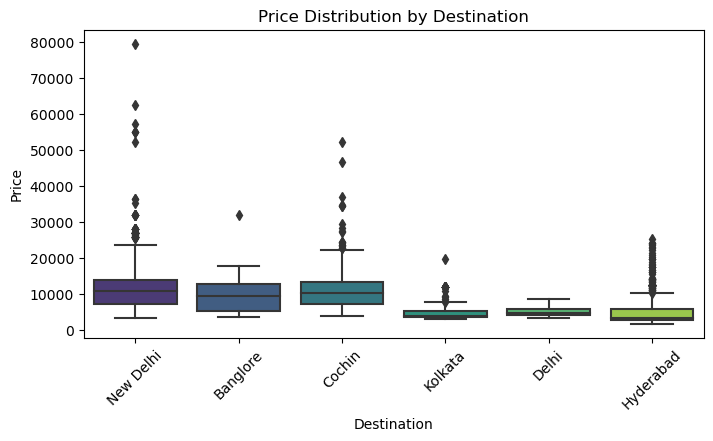

In [49]:
plt.figure(figsize=(8, 4))  # Set the figure size
sns.boxplot(x='Destination', y='Price', data=data, palette='viridis')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Price Distribution by Destination')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [50]:
df3 = pd.get_dummies(data2["Destination"],prefix="Destination",drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(["Destination"],axis=1)

### 1.7. Feature Engineering

In [51]:
data2.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [52]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [53]:
data2["Total_Stops"]=data2["Total_Stops"].map({"4 stops":5,"3 stops":4,"2 stops":3,"1 stop":2,"non-stop":1})

In [54]:
len(data2.columns)

29

In [55]:
data2.corr()

,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663,0.261553,...,-0.016163,-0.190651,0.295776,0.124437,-0.234809,0.295776,-0.340182,-0.234809,-0.190651,0.006732
Total_Stops,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.271094,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.050432,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
journey_day,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.032490,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
journey_month,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,-0.045981,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_Hour,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,-0.012879,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_Minutes,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.045688,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_Hour,0.051531,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.088872,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_Minutes,-0.069663,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,0.061231,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Airline_Air India,0.261553,0.271094,0.050432,-0.032490,-0.045981,-0.012879,-0.045688,0.088872,0.061231,1.000000,...,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072


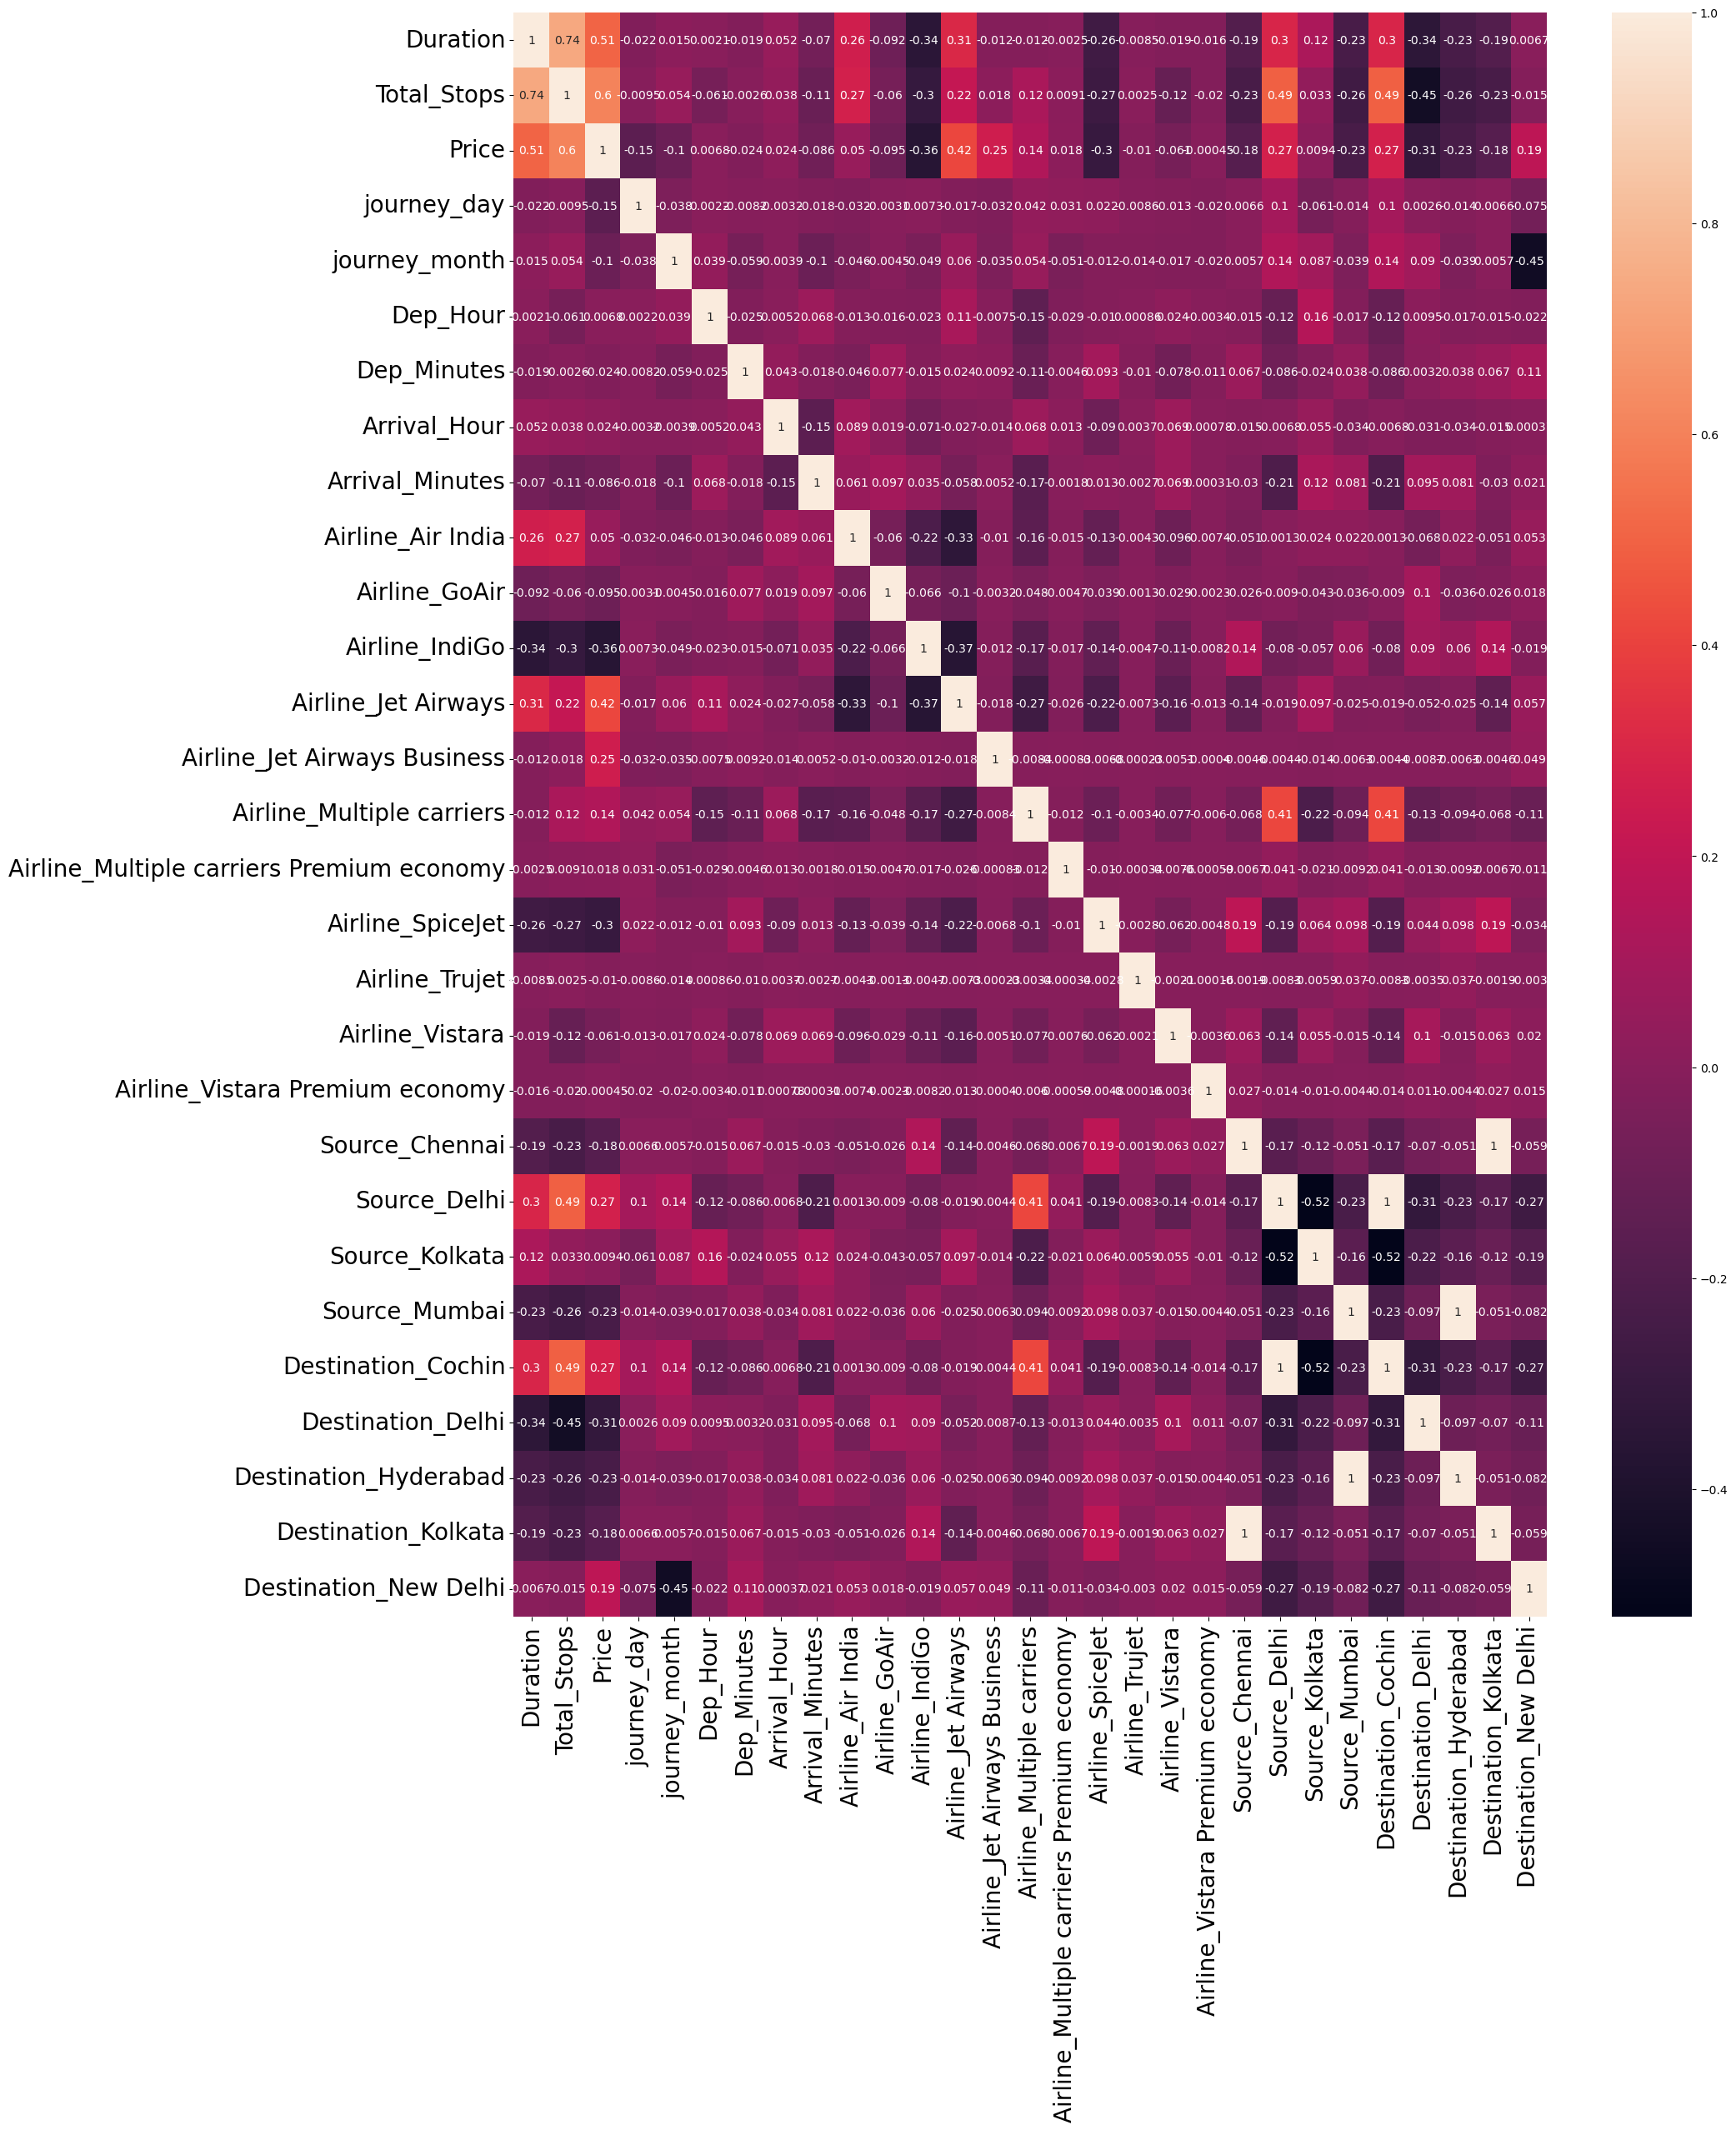

In [56]:
plt.figure(figsize=(20,25))
sns.heatmap(data2.corr(),annot=True)
plt.tick_params(labelsize=20)

In [57]:
data3 = data2.iloc[0:,0:9]
data3

,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,170.0,1,3897,24,3,22,20,1,10
1,445.0,3,7662,1,5,5,50,13,15
2,1140.0,3,13882,9,6,9,25,4,25
3,325.0,2,6218,12,5,18,5,23,30
4,285.0,2,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...
10678,150.0,1,4107,9,4,19,55,22,25
10679,155.0,1,4145,27,4,20,45,23,20
10680,180.0,1,7229,27,4,8,20,11,20
10681,160.0,1,12648,1,3,11,30,14,10


<Axes: >

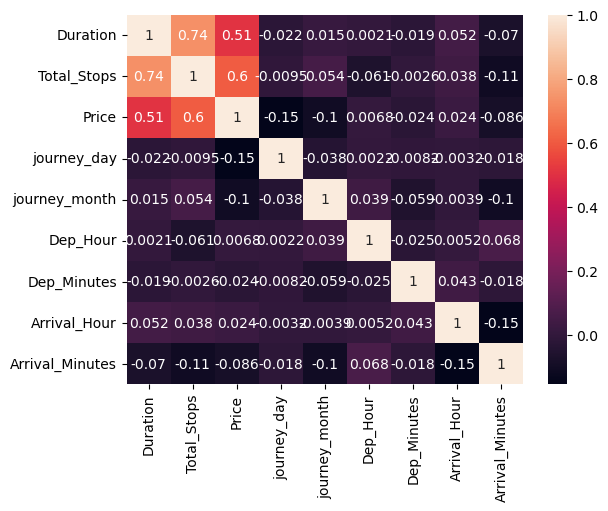

In [58]:
sns.heatmap(data3.corr(),annot=True)

### 1.8. Model Creation

In [59]:
x=data2.drop(["Price"],axis=1)
y=data2["Price"]

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=4)

In [61]:
x_train

,Duration,Total_Stops,journey_day,journey_month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
9037,155.0,1,24,3,10,20,12,55,0,0,...,0,0,0,1,0,0,0,0,0,0
4537,440.0,3,12,6,11,40,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4675,295.0,2,6,6,9,20,14,15,0,0,...,0,0,0,1,0,0,0,0,0,0
2203,140.0,1,24,6,7,55,10,15,0,0,...,0,1,0,0,0,0,0,0,1,0
9714,705.0,2,24,6,9,15,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,150.0,1,6,4,19,55,22,25,0,0,...,0,0,0,1,0,0,0,0,0,0
709,155.0,1,15,6,17,0,19,35,0,0,...,0,0,0,0,0,0,1,0,0,0
10680,180.0,1,27,4,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
8366,590.0,3,12,6,12,0,21,50,1,0,...,0,0,0,1,0,0,0,0,0,0


### Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_LR_pred=LR_model.predict(x_test)
y_LR_pred

array([11374.04245025, 13815.27837098,  9680.90170506, ...,
        6878.58011599,  9707.24946689,  4399.62750508])

In [64]:
y_LR_pred.shape

(3205,)

In [65]:
LR_model.coef_

array([-2.65834690e-02,  2.73768194e+03, -7.13651541e+01, -3.92757278e+02,
        2.33038355e+01, -1.40550431e+00, -1.02988575e+01,  6.48983500e-01,
        1.64409194e+03,  1.09089849e+02,  2.37918205e+02,  4.38037215e+03,
        4.86498357e+04,  3.71953867e+03,  3.87473066e+03, -2.75802658e+02,
        2.52657628e-09,  2.09037757e+03,  3.66740635e+03, -2.36467199e+00,
        5.25917479e+01, -2.40680292e+01, -8.38516562e+02,  5.25917479e+01,
       -8.90016895e+02, -8.38516562e+02, -2.36467199e+00,  1.70237441e+03])

### 1.8. Evaluate the model

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [67]:
y_LR_pred

array([11374.04245025, 13815.27837098,  9680.90170506, ...,
        6878.58011599,  9707.24946689,  4399.62750508])

In [68]:
MSE = mean_squared_error(y_test,y_LR_pred)
print("MSE =",MSE)
MAE = mean_absolute_error(y_test,y_LR_pred)
print("MAE =",MAE)
RMSE=np.sqrt(MSE)
print("RMSE =",RMSE)
R2_score =r2_score(y_test,y_LR_pred)
print("R2 Score =",R2_score)
# ad_R2= 1-(1-R2_score)(y_test.shape-1)/(y_test.shape)-(x_test.shape)-1
ad_R2= 1-(1-R2_score)*(3205-1)/(3205-28-1)
print("AD R2 Score =",ad_R2)

MSE = 8290115.66738979
MAE = 2017.4272203931646
RMSE = 2879.256096180017
R2 Score = 0.6275709141452431
AD R2 Score = 0.6242875342951382


### KNN Model

In [69]:
from sklearn.neighbors import KNeighborsRegressor
KN=KNeighborsRegressor(n_neighbors=5)
KN.fit(x_train,y_train)
y_KNN_pred=KN.predict(x_test)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_KNN_pred.shape)

(7477, 28)
(3205, 28)
(3205,)


In [71]:
MSE=mean_squared_error(y_test,y_KNN_pred)
print("MSE =",MSE)
MAE=mean_absolute_error(y_test,y_KNN_pred)
print("MAE =",MAE)
KNN_R2=r2_score(y_test,y_KNN_pred)
print("KNN_R2_Score =",KNN_R2)
KNN_AD_R2= 1-(1-KNN_R2)*(3205-1)/(3205-28-1)
print("KNN_AD_R2_Score =",KNN_AD_R2)

MSE = 11003772.377634944
MAE = 1951.0476131045243
KNN_R2_Score = 0.5056613137887935
KNN_AD_R2_Score = 0.5013031641622463


In [72]:
(y_KNN_pred!=y_test).sum()

3158

In [73]:
len(y_test)

3205

In [74]:
(y_KNN_pred!=y_test).sum()/len(y_test)

0.9853354134165366

In [75]:
Error_Rate=[]
for i in range(1,13):
    KN=KNeighborsRegressor(n_neighbors=i)
    KN.fit(x_train,y_train)
    y_KNN_pred=KN.predict(x_test)
    error=(y_KNN_pred!=y_test).sum()/len(y_test)
    Error_Rate.append(error)

In [76]:
Error_Rate

[0.7987519500780031,
 0.9185647425897036,
 0.9597503900156006,
 0.9765990639625585,
 0.9853354134165366,
 0.9909516380655227,
 0.9946957878315132,
 0.9959438377535101,
 0.997191887675507,
 0.9990639625585024,
 0.9993759750390016,
 1.0]

Text(0.5, 1.0, 'Find K Value')

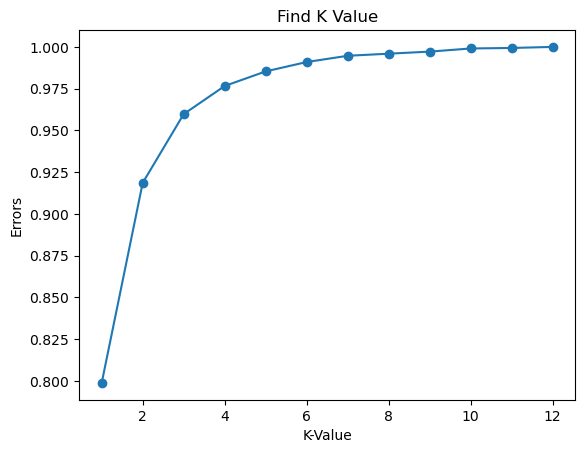

In [77]:
plt.plot(range(1,13),Error_Rate,marker="o")
plt.xlabel("K-Value")
plt.ylabel("Errors")
plt.title("Find K Value")

In [78]:
KN=KNeighborsRegressor(n_neighbors=4)
KN.fit(x_train,y_train)
y_KNN_pred=KN.predict(x_test)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_KNN_pred.shape)

(7477, 28)
(3205, 28)
(3205,)


In [80]:
MSE=mean_squared_error(y_test,y_KNN_pred)
print("MSE =",MSE)
MAE=mean_absolute_error(y_test,y_KNN_pred)
print("MAE =",MAE)
KNN_R2=r2_score(y_test,y_KNN_pred)
print("KNN_R2_Score =",KNN_R2)
KNN_AD_R2= 1-(1-KNN_R2)*(3205-1)/(3205-28-1)
print("KNN_AD_R2_Score =",KNN_AD_R2)

MSE = 10960294.075858034
MAE = 1930.2971918876756
KNN_R2_Score = 0.5076145536270491
KNN_AD_R2_Score = 0.503273623999076


### SVM-Supprt Ventor Machine

In [81]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [82]:
y_svm_pred=svr.predict(x_test)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_svm_pred.shape)

(7477, 28)
(3205, 28)
(3205,)
(3205,)


In [84]:
MSE = mean_squared_error(y_test,y_svm_pred)
print("MSE =",MSE)
MAE = mean_absolute_error(y_test,y_svm_pred)
print("MSA =",MAE)
R2 = r2_score(y_test,y_svm_pred)
print("SVM_R2 =",R2)
AD_R2 = 1-(1-R2)*(3205-1)/(3205-28-1)
print("SVM_AD_R2 =",AD_R2)

MSE = 19617735.11856914
MSA = 3134.815624538007
SVM_R2 = 0.11868356849478234
SVM_AD_R2 = 0.110913776277482


### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_dtr_test_pred=DTR.predict(x_test)
y_dtr_train_pred=DTR.predict(x_train)

In [92]:
# Test Model
MSE = mean_squared_error(y_test,y_dtr_test_pred)
print("MSE =",MSE)
MAE = mean_absolute_error(y_test,y_dtr_test_pred)
print("MSA =",MAE)
R2 = r2_score(y_test,y_dtr_test_pred)
print("DTR_R2 =",R2)
AD_R2 = 1-(1-R2)*(3205-1)/(3205-28-1)
print("DTR_AD_R2 =",AD_R2)

MSE = 5347513.266872422
MSA = 1322.0014664586581
DTR_R2 = 0.7597657792144482
DTR_AD_R2 = 0.7576478452780516


In [95]:
# Train Model
MSE = mean_squared_error(y_train,y_dtr_train_pred)
print("MSE =",MSE)
MAE = mean_absolute_error(y_train,y_dtr_train_pred)
print("MSA =",MAE)
R2 = r2_score(y_train,y_dtr_train_pred)
print("DTR_R2 =",R2)
AD_R2 = 1-(1-R2)*(7477-1)/(7477-28-1)
print("DTR_AD_R2 =",AD_R2)

MSE = 571010.1785609202
MSA = 287.3614729615265
DTR_R2 = 0.9725897479181009
DTR_AD_R2 = 0.9724867018576426
